<a href="https://colab.research.google.com/github/Branis333/Water-Quality-Model-peer9/blob/Ian/formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [25]:
!pip install -U scikeras
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from scikeras.wrappers import  KerasRegressor

In [16]:
data = pd.read_csv('/content/sample_data/water_potability.csv')
# print(data.shape)
filled_data = data.fillna(data.mean(),axis=0)
# data.shape[0] - dropped_rows.shape[0] 1275 rows with N/A values so 38.9% of the dataset
filled_data


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


Plot the Data Appropriately

In [22]:

# generate 2d classification dataset
X , Y = filled_data.drop('Potability',axis=1) , filled_data['Potability']
scaler = StandardScaler()
cols_trans = ColumnTransformer(transformers=[('scaler',scaler,X.columns)])
# sx_arr = cols_trans.fit_transform(X)
# X = pd.DataFrame(sx_arr)
# X

,0,1,2,3,4,5,6,7,8
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124
3272,4.953704e-01,-0.085667,-0.534295,0.593290,3.145987e-15,-0.417706,1.698560,0.000000,-1.497627
3273,1.591254e+00,-0.626829,1.270810,0.144017,3.145987e-15,0.072263,-0.981329,0.218748,-0.856007
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,3.145987e-15,-0.288597,-0.942064,0.703468,0.950797


In [20]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.3)
# Split the validation set

,Potability
1616,1
1727,0
119,0
2078,0
425,0
...,...
161,0
3034,0
2094,0
1159,1


# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member 1
def model_Ian_Ganza():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(9,)),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(2,activation='sigmoid')
  ])
  return model

  adagrad = Adagrad(learning_rate=0.03)
  krModel = KerasRegressor(build_fn=model_Ian_Ganza,batch_size=32,epochs=12,validation_split='',optimizer=adagrad,loss='binary_crossentropy',metrics=['accuracy'])
  pipeline = Pipeline(steps=[('preprocessor',cols_trans),('model',krModel)])

#


In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

Epoch 225: early stopping
Train: 0.967, Test: 0.814


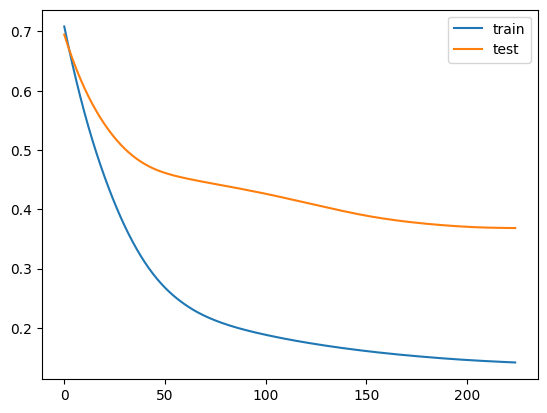

In [ ]:

Reuse this codeif necessary
#fit model
history = model.fit(X, Y, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy

In [ ]:
#Data Loading and Preprocessing
# The coach will never do this!!
regularizer = 'l1'

In [ ]:
model = Sequential()
model.add(Dense(32, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
model.add(Dropout(0.2))
#adding Dropout
model.add(Dense(64, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
#adding Dropout
model.add(Dense(128, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
model.add(Dropout(0.2))
#adding Dropout
model.add(Dense(2, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callback =EarlyStopping(monitor='loss',patience=3)

In [ ]:
model.compile(optimizer='adam', loss= 'rmse', metrics = ['accuracy'])

In [ ]:
model.fit(X, Y, epochs=1000, batch_size= 128, callbacks=[callback], verbose=0)

NameError: name 'X' is not defined

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 2224, 32)       │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2224, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2224, 2)        │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,266 (28.38 KB)

 Trainable params: 7,266 (28.38 KB)

 Non-trainable params: 0 (0.00 B)